This project is about **data cleaning** and we're gonna clean a really raw and messy dataset. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

sb.set_style("dark")

pd.options.display.max_columns=1000
# pd.options.display.max_rows=1000

In [2]:
df = pd.read_csv("fifa21_raw_data.csv")
df.shape

C:\Users\HP\AppData\Local\Temp\ipykernel_13584\1336380609.py:1: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("fifa21_raw_data.csv")


(18979, 77)

In [3]:
df.head()

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,ID,Height,Weight,foot,BOV,BP,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,158023,"5'7""",159lbs,Left,93,RW,0,"Jul 1, 2004",NaN,€67.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,20801,"6'2""",183lbs,Right,92,ST,0,"Jul 10, 2018",NaN,€46M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,\n344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,200389,"6'2""",192lbs,Right,91,GK,2,"Jul 16, 2014",NaN,€75M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,192985,"5'11""",154lbs,Right,91,CAM,0,"Aug 30, 2015",NaN,€87M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,\n163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,190871,"5'9""",150lbs,Right,91,LW,0,"Aug 3, 2017",NaN,€90M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,\n273


In [4]:
df.sample(5)

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,ID,Height,Weight,foot,BOV,BP,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
4015,https://cdn.sofifa.com/players/213/317/21_60.png,Jin Su Kim,http://sofifa.com/player/213317/jin-su-kim/210...,Korea Republic,LB LM,Kim Jin Su,28,71,71,\n\n\n\nAl Nassr\n2020 ~ 2025\n\n,213317,"5'10""",152lbs,Left,71,LB,0,"Aug 31, 2020",NaN,€2M,€22K,€3.4M,246,69,26,60,68,23,328,68,66,68,62,64,384,87,80,76,65,76,300,46,68,72,62,52,312,64,68,68,57,55,63,203,66,69,68,48,14,6,12,9,7,1821,387,3 ★,3★,Medium,Medium,1 ★,83,39,65,68,67,65,\n7
18481,https://cdn.sofifa.com/players/255/373/21_60.png,Bruno Barticciotto,http://sofifa.com/player/255373/bruno-barticci...,Chile,ST,B. Barticciotto,19,52,72,\n\n\n\nUniversidad Católica\n2020 ~ 2021\n\n,255373,"5'9""",154lbs,Right,54,ST,20,"Jan 1, 2020",NaN,€110K,€1K,€264K,219,29,62,54,40,34,184,44,31,34,28,47,287,59,61,62,48,57,249,52,65,49,38,45,194,27,12,58,40,57,49,46,15,16,15,61,11,12,14,14,10,1240,257,3 ★,2★,High,Low,1 ★,60,55,35,48,19,40,4
10733,https://cdn.sofifa.com/players/241/652/21_60.png,Kevin Kabran,http://sofifa.com/player/241652/kevin-kabran/2...,Sweden,LM ST,K. Kabran,26,65,66,\n\n\n\nIK Start\n2018 ~ 2020\n\n,241652,"6'1""",181lbs,Right,65,LM,1,"Jan 15, 2018",NaN,€625K,€1K,€828K,295,58,64,54,61,58,285,65,55,42,56,67,351,80,73,71,57,70,323,61,54,71,76,61,274,63,32,63,61,55,62,114,53,31,30,56,7,12,12,14,11,1698,373,3 ★,3★,High,Medium,1 ★,76,62,58,66,40,71,\n1
9376,https://cdn.sofifa.com/players/206/031/21_60.png,Jefté Betancor Sánchez,http://sofifa.com/player/206031/jefte-betancor...,Spain,ST,Jefté,26,66,67,\n\n\n\nFC Voluntari\n2020 ~ 2021\n\n,206031,"6'2""",174lbs,Right,67,ST,1,"Sep 22, 2020",NaN,€775K,€3K,€1.1M,316,53,69,64,63,67,261,62,42,55,38,64,288,53,54,58,64,59,322,66,58,62,75,61,268,58,23,72,46,69,63,81,24,37,20,57,10,15,9,8,15,1593,334,3 ★,2★,High,Medium,1 ★,54,67,52,62,31,68,\n1
16820,https://cdn.sofifa.com/players/239/428/21_60.png,Alessandro Kräuchi,http://sofifa.com/player/239428/alessandro-kra...,Switzerland,RB RW,A. Kräuchi,22,57,68,\n\n\n\nFC St. Gallen\n2017 ~ 2021\n\n,239428,"5'9""",157lbs,Left,58,LM,11,"Jul 1, 2017",NaN,€160K,€2K,€264K,234,54,43,44,59,34,244,59,35,40,52,58,336,68,66,72,55,75,236,46,50,54,48,38,232,44,53,52,48,35,44,151,49,48,54,44,5,10,9,12,8,1477,322,3 ★,2★,High,Low,1 ★,67,42,53,61,50,49,2


As we can see, this dataset is about soccer, more precisely informations about all players in the game FIFA21. You can have more informations about this dataset [here](https://www.kaggle.com/datasets/yagunnersya/fifa-21-messy-raw-dataset-for-cleaning-exploring?select=fifa21+raw+data+v2.csv).

## Order issues

#### Getting rid of non-relevant columns

In [5]:
df = df.drop(columns=["photoUrl", "playerUrl"])
df.shape

(18979, 75)

In [6]:
df.columns

Index(['LongName', 'Nationality', 'Positions', 'Name', 'Age', '↓OVA', 'POT',
       'Team & Contract', 'ID', 'Height', 'Weight', 'foot', 'BOV', 'BP',
       'Growth', 'Joined', 'Loan Date End', 'Value', 'Wage', 'Release Clause',
       'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy',
       'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve',
       'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY', 'Hits'],
      dtype='object')

#### Looking for duplicated rows

In [7]:
df[df.LongName.duplicated()]

,LongName,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,ID,Height,Weight,foot,BOV,BP,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
944,Kevin Berlaso,Ecuador,RB,K. Berlaso,32,77,77,\n Ecuador\nFree\n\n,251698,"5'8""",152lbs,Right,77,RB,0,"Jan 1, 2010",NaN,€0,€0,€0,306,72,47,60,73,54,350,75,75,54,68,78,397,77,78,86,77,79,345,69,70,86,57,63,323,73,70,69,63,48,73,224,71,75,78,58,11,12,11,16,8,2003,420,3 ★,4★,High,Medium,2 ★,78,56,69,77,72,68,\n12
1187,Lisandro López,Argentina,CB,L. López,30,76,76,\n\n\n\nBoca Juniors\n2020 ~ 2023\n\n,215051,"6'2""",176lbs,Right,76,CB,0,"Jan 1, 2020",NaN,€6M,€16K,€8.4M,277,33,48,80,66,50,246,59,37,32,56,62,310,57,66,64,73,50,335,67,84,63,77,44,279,77,77,38,41,46,73,229,76,77,76,53,14,12,8,6,13,1729,375,2 ★,2★,Medium,High,3 ★,62,51,50,61,77,74,\n7
2516,Gonzalo Castro,Germany,CM LB,G. Castro,33,73,73,\n\n\n\nVfB Stuttgart\n2018 ~ 2021\n\n,167431,"5'8""",159lbs,Right,73,CM,0,"Jul 1, 2018",NaN,€2.3M,€20K,€4.1M,328,77,63,47,75,66,370,72,80,69,73,76,342,55,55,78,75,79,345,74,73,67,59,72,336,64,72,67,75,58,80,207,70,68,69,60,14,8,13,10,15,1988,401,3 ★,3★,Medium,Medium,2 ★,55,67,75,74,67,63,\n15
2562,Ben Davies,England,CB,B. Davies,24,73,79,\n\n\n\nPreston North End\n2013 ~ 2021\n\n,213017,"6'1""",163lbs,Left,75,CB,6,"Jan 1, 2013",NaN,€4.9M,€18K,€10.3M,283,61,36,72,71,43,277,59,44,40,68,66,348,75,73,65,70,65,312,42,78,75,78,39,256,65,72,37,34,48,71,225,79,74,72,52,6,15,10,15,6,1753,384,3 ★,2★,Medium,Medium,1 ★,74,39,58,63,75,75,\n38
2955,Claudio Bravo,Argentina,LB,C. Bravo,23,73,82,\n\n\n\nClub Atlético Banfield\n2016 ~ 2021\n\n,232646,"5'7""",152lbs,Left,74,LWB,9,"Jan 4, 2016",NaN,€5.5M,€10K,€9.4M,282,70,48,53,66,45,296,76,51,38,60,71,359,77,72,72,63,75,308,59,71,74,57,47,321,73,75,57,69,47,64,218,71,73,74,58,14,12,8,11,13,1842,397,2 ★,3★,Medium,Medium,1 ★,74,50,64,73,71,65,\n40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18703,Yuan Zhang,China PR,CM,Zhang Yuan,23,51,56,\n\n\n\nShenzhen FC\n2020 ~ 2023\n\n,241341,"6'0""",159lbs,Right,56,RM,5,"Jul 16, 2020",NaN,€50K,€2K,€81K,237,40,42,65,50,40,254,56,44,50,52,52,325,70,75,75,45,60,280,55,65,60,60,40,257,55,45,60,52,45,48,145,55,45,45,56,12,12,10,13,9,1554,331,3 ★,2★,Medium,Medium,1 ★,73,45,48,56,50,59,2
18741,Alfie Jones,England,GK,A. Jones,19,50,66,\n\n\n\nCrawley Town\n2019 ~ 2021\n\n,243202,"6'1""",161lbs,Right,50,GK,16,"Aug 8, 2019",NaN,€50K,€500,€119K,57,14,6,12,17,8,61,5,13,10,19,14,157,24,20,35,45,33,158,34,56,18,42,8,71,21,7,5,22,16,33,43,19,12,12,245,56,48,45,44,52,792,267,2 ★,1★,Medium,Medium,1 ★,56,48,45,52,22,44,3
18813,Joe Wright,England,GK,J. Wright,19,50,64,\n\n\n\nMillwall\n2019 ~ 2024\n\n,251563,"6'1""",181lbs,Right,50,GK,14,"Jul 1, 2019",NaN,€50K,€650,€126K,63,13,6,14,21,9,74,7,14,13,22,18,143,16,20,21,38,48,185,35,56,27,60,7,87,20,13,5,34,15,39,30,8,12,10,248,53,54,47,46,48,830,266,3 ★,1★,Medium,Medium,1 ★,53,54,47,48,18,46,1
18834,Mark Byrne,Republic of Ireland,CAM LW RW,M. Byrne,19,50,65,\n\n\n\nSligo Rovers\n2020 ~ 2020\n\n,255948,"5'10""",163lbs,Right,52,CAM,15,"Feb 13, 2020",NaN,€60K,€500,€131K,211,40,35,42,58,36,247,46,46,42,59,54,280,56,64,54,41,65,227,43,55,48,53,28,216,42,27,46,56,45,53,122,36,40,46,51,11,14,7,10,9,1354,286,3 ★,2★,High,Medium,1 ★,60,36,53,50,

In [8]:
df.query("LongName == 'Claudio Bravo'")

,LongName,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,ID,Height,Weight,foot,BOV,BP,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
1127,Claudio Bravo,Chile,GK,C. Bravo,37,77,77,\n\n\n\nReal Betis\n2020 ~ 2022\n\n,174543,"6'0""",176lbs,Right,77,GK,0,"Aug 30, 2020",NaN,€900K,€12K,€1.9M,110,12,13,18,56,11,171,22,25,38,54,32,309,58,54,63,72,62,269,63,81,39,69,17,171,40,23,16,69,23,64,52,15,18,19,389,77,76,84,75,77,1471,445,3 ★,1★,Medium,Medium,3 ★,77,76,84,77,56,75,\n34
2955,Claudio Bravo,Argentina,LB,C. Bravo,23,73,82,\n\n\n\nClub Atlético Banfield\n2016 ~ 2021\n\n,232646,"5'7""",152lbs,Left,74,LWB,9,"Jan 4, 2016",NaN,€5.5M,€10K,€9.4M,282,70,48,53,66,45,296,76,51,38,60,71,359,77,72,72,63,75,308,59,71,74,57,47,321,73,75,57,69,47,64,218,71,73,74,58,14,12,8,11,13,1842,397,2 ★,3★,Medium,Medium,1 ★,74,50,64,73,71,65,\n40


In [9]:
df[df.duplicated()]

,LongName,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,ID,Height,Weight,foot,BOV,BP,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
944,Kevin Berlaso,Ecuador,RB,K. Berlaso,32,77,77,\n Ecuador\nFree\n\n,251698,"5'8""",152lbs,Right,77,RB,0,"Jan 1, 2010",NaN,€0,€0,€0,306,72,47,60,73,54,350,75,75,54,68,78,397,77,78,86,77,79,345,69,70,86,57,63,323,73,70,69,63,48,73,224,71,75,78,58,11,12,11,16,8,2003,420,3 ★,4★,High,Medium,2 ★,78,56,69,77,72,68,\n12


In [10]:
df[df.ID.duplicated()]

,LongName,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,ID,Height,Weight,foot,BOV,BP,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
944,Kevin Berlaso,Ecuador,RB,K. Berlaso,32,77,77,\n Ecuador\nFree\n\n,251698,"5'8""",152lbs,Right,77,RB,0,"Jan 1, 2010",NaN,€0,€0,€0,306,72,47,60,73,54,350,75,75,54,68,78,397,77,78,86,77,79,345,69,70,86,57,63,323,73,70,69,63,48,73,224,71,75,78,58,11,12,11,16,8,2003,420,3 ★,4★,High,Medium,2 ★,78,56,69,77,72,68,\n12


Many players share the same *LongName* but there's only one of them who is duplicated : Kevin Berlaso.

Let's get rid of that duplicate: 

In [11]:
df = df[~df.duplicated()]
df.index = range(len(df))
df[df.duplicated()]

,LongName,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,ID,Height,Weight,foot,BOV,BP,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits


#### _Team & Contract_ column

Contains 3 variables instead of one : *Club*, *starting date of contract* and *end date of contract*. Let's split it and create appropriate columns.

By inspecting that column, we can see that there are 3 situations with that column:

1. The player doesn't belong to any club, so he's **free**
2. The player is attached to a certain club but he's **on loan**; in this case the column only has the loan date end
3. The player is attached to a certain club and he's not on loan; in this case the column has both the contract date start and the contract date end

We define a function based on regular expression to retrieve all those informations:

In [12]:
import re

In [13]:
def f(contract):
    """
    this function takes a string 'contract' and returns :
        * two years (start and end of contract) if the player is attached to a club and not on loan
        * the end of contract year if the player is attached to a club but on loan
        * nothing if the player is free
    """
    if "Free" in contract:
        return
    
    club = re.findall(r'\n\n\n\n(.*?)\n', contract)[0]
    if "On Loan" in contract:
        end_date = re \
               .findall("\d{4} On Loan", contract)[0] \
               .split("On Loan")[0] 
        end_date = int(end_date)
        return club, end_date
    
    start_date, end_date = re \
                 .findall('\d{4} ~ \d{4}', contract)[0] \
                 .split(" ~ ")
    start_date, end_date = int(start_date), int(end_date)
    return club, start_date, end_date

In [14]:
# Example
f("\n\n\n\nTSG 1899 Hoffenheim\n2015 ~ 2022\n\n")

('TSG 1899 Hoffenheim', 2015, 2022)

In [15]:
df["Club"], df["Start_contract_date"], df["End_contract_date"] = None, None, None
for i in range(len(df)):
    res = f(df.loc[i, "Team & Contract"])
    if not res:
        continue
    df.loc[i, "Club"] = res[0]
    if len(res) == 2:
        df.loc[i, "End_contract_date"] = res[1]
    else: # i.e len(res) == 3:
        df.loc[i, "Start_contract_date"] = res[1]
        df.loc[i, "End_contract_date"] = res[2]

In [16]:
df.sample(10, random_state=43)

,LongName,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,ID,Height,Weight,foot,BOV,BP,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Club,Start_contract_date,End_contract_date
11219,Pascal Sohm,Germany,ST RM LM,P. Sohm,28,64,64,\n\n\n\nSG Dynamo Dresden\n2020 ~ 2022\n\n,238686,"6'2""",170lbs,Right,65,RM,0,"Jul 23, 2020",NaN,€475K,€3K,€689K,289,62,62,48,60,57,283,62,66,37,54,64,352,76,77,72,66,61,342,72,54,85,75,56,243,48,17,65,59,54,70,72,24,23,25,49,13,11,10,8,7,1630,357,3 ★,2★,High,High,1 ★,77,62,58,64,25,71,\n2,SG Dynamo Dresden,2020,2022
11171,Bryan Olivera,Uruguay,CAM,B. Olivera,26,64,67,\n\n\n\nCentro Atlético Fénix\n2020 ~ 2022\n\n,253265,"5'7""",143lbs,Left,66,CAM,3,"Jan 10, 2020",NaN,€550K,€500,€1.2M,274,50,65,38,63,58,303,65,60,65,52,61,345,64,77,72,65,67,324,59,75,62,58,70,282,51,44,62,65,60,65,99,45,23,31,59,12,12,13,8,14,1686,353,3 ★,3★,Medium,Medium,1 ★,71,64,59,65,36,58,\n3,Centro Atlético Fénix,2020,2022
28,Jadon Sancho,England,RM LM CAM,J. Sancho,20,87,93,\n\n\n\nBorussia Dortmund\n2017 ~ 2023\n\n,233049,"5'11""",168lbs,Right,89,CAM,6,"Aug 31, 2017",NaN,€69.5M,€82K,€132.1M,373,83,81,38,88,83,380,92,81,48,68,91,435,86,81,91,87,90,328,70,51,77,67,63,313,44,39,83,87,60,84,105,32,41,32,52,7,11,10,11,13,1986,430,3 ★,5★,High,Medium,3 ★,83,74,81,91,37,64,\n663,Borussia Dortmund,2017,2023
6304,Declan Rudd,England,GK,D. Rudd,29,69,71,\n\n\n\nPreston North End\n2017 ~ 2023\n\n,188657,"6'3""",187lbs,Right,69,GK,2,"Jul 1, 2017",NaN,€875K,€11K,€1.7M,91,15,12,14,36,14,107,20,15,13,36,23,253,54,46,50,69,34,208,48,46,31,64,19,167,24,22,13,65,43,39,42,15,13,14,336,72,62,64,65,73,1204,386,3 ★,1★,Medium,Medium,1 ★,72,62,64,73,50,65,\n7,Preston North End,2017,2023
5145,Leonardo Lopes de Souza,Brazil,ST,Leonardo,23,70,75,\n\n\n\nUrawa Red Diamonds\n2020 ~ 2023\n\n,254894,"5'11""",170lbs,Right,72,ST,5,"Jan 4, 2020",NaN,€2.4M,€7K,€3.2M,325,46,74,69,64,72,290,67,60,56,38,69,336,68,69,66,68,65,328,71,69,52,69,67,299,62,25,72,66,74,70,81,26,29,26,53,7,13,8,14,11,1712,358,3 ★,3★,High,Medium,1 ★,69,72,56,67,31,63,\n5,Urawa Red Diamonds,2020,2023
5433,Johann Obiang,Gabon,LB LWB,J. Obiang,26,69,70,\n\n\n\nRodez Aveyron Football\n2020 ~ 2025\n\n,212483,"5'7""",141lbs,Left,69,LB,1,"Jun 24, 2020",NaN,€1.1M,€3K,€2M,278,67,52,49,64,46,288,64,59,36,59,70,388,80,79,73,64,92,278,53,74,63,39,49,301,59,67,64,58,53,67,196,67,64,65,48,11,7,7,12,11,1777,375,2 ★,3★,Medium,Medium,1 ★,79,52,61,68,64,51,\n3,Rodez Aveyron Football,2020,2025
14327,Kurtis Guthrie,England,ST,K. Guthrie,27,61,62,\n\n\n\nBradford City\n2020 ~ 2021\n\n,204915,"6'3""",154lbs,Right,62,ST,1,"Jan 31, 2020",NaN,€300K,€4K,€548K,280,47,61,62,55,55,268,63,54,38,52,61,316,70,67,63,54,62,333,65,72,69,70,57,266,56,36,59,52,63,57,119,29,48,42,48,10,8,13,8,9,1630,350,3 ★,3★,Medium,Medium,1 ★,68,61,51,62,41,67,\n5,Bradford City,2020,2021
8666,Louka Prip,Denmark,RM,L. Prip,23,66,72,\n\n\n\nAC Horsens\n2019 ~ 2022\n\n,247086,"6'0""",154lbs,Left,67,LM,6,"Jan 14, 2019",NaN,€875K,€3K,€1.3M,278,61,56,41,64,56,310,67,60,50,67,66,354,80,73,74,56,71,304,67,47,69,64,57,286,62,43,59,63,59,61,126,37,47,42,49,11,7,5,15,11,1707,371,3 ★,3★,High,Medium,1 ★,76,59,63,67,42,64,\n1,AC Horsens,2019,2022
8925,Víctor Álvarez Rozada,Spain,RM,Viti Rozada,22,66,74,\n\n\n\nReal Oviedo\n2015 ~ 2022\n\n,234350,"5'7""",141lbs,Right,67,RM,8,"Jul 1, 2015",NaN,€950K,€3K,€1.7M,274,62,62,43,59,48,280,66,54,41,54,65,390,84,87,76,61,82,293,69,30,70,62,62,287,68,47,65,54,53,64,133,41,45,47,50,12,12,7,6,13,1707,380,3 ★

We can now delete the _Team & Contract_ column:

In [17]:
del df['Team & Contract']

In [18]:
df.shape

(18978, 77)

## Quality issues

#### Any missing value?

In [19]:
df.isnull().any().sum()

4

#### Looking for Non-valid Data and Inconsistent Data

In [20]:
excep = []
for val in df.Value:
    try:
        assert "€" in val and "M" in val
    except:
        excep.append(val)
print(len(excep))

12192


In [21]:
df.iloc[:3, :15]

,LongName,Nationality,Positions,Name,Age,↓OVA,POT,ID,Height,Weight,foot,BOV,BP,Growth,Joined
0,Lionel Messi,Argentina,RW ST CF,L. Messi,33,93,93,158023,"5'7""",159lbs,Left,93,RW,0,"Jul 1, 2004"
1,C. Ronaldo dos Santos Aveiro,Portugal,ST LW,Cristiano Ronaldo,35,92,92,20801,"6'2""",183lbs,Right,92,ST,0,"Jul 10, 2018"
2,Jan Oblak,Slovenia,GK,J. Oblak,27,91,93,200389,"6'2""",192lbs,Right,91,GK,2,"Jul 16, 2014"


In [22]:
df.iloc[:3, 15:30]

,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing
0,NaN,€67.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91
1,NaN,€46M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77
2,NaN,€75M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40


In [23]:
excep = []
for val in df.Wage:
    try:
        assert "€" in val and "K" in val
    except:
        excep.append(val)
print(len(excep))

4154


In [24]:
excep = []
for val in df['Release Clause']:
    try:
        assert "€" in val and "M" in val
    except:
        excep.append(val)
print(len(excep))

9349


In [25]:
df.iloc[:3, 30:45]

,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression
0,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44
1,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63
2,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34


In [26]:
df.iloc[:3, 45:60]

,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8
1,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11
2,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90


In [27]:
df.iloc[:3, 60:]

,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Club,Start_contract_date,End_contract_date
0,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,\n372,FC Barcelona,2004,2021
1,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,\n344,Juventus,2018,2022
2,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,\n86,Atlético Madrid,2014,2023


In [28]:
df["W/F"].value_counts()

3 ★    11694
2 ★     4141
4 ★     2722
5 ★      283
1 ★      138
Name: W/F, dtype: int64

In [29]:
df["SM"].value_counts()

2★    9142
3★    6576
1★    2075
4★    1130
5★      55
Name: SM, dtype: int64

In [30]:
df["IR"].value_counts()

1 ★    17628
2 ★     1018
3 ★      281
4 ★       45
5 ★        6
Name: IR, dtype: int64

In [31]:
df["Hits"].value_counts()

\n1      3216
\n2      2453
\n3      1774
\n4      1236
1        1105
         ... 
\n194       1
\n556       1
\n494       1
\n332       1
58          1
Name: Hits, Length: 408, dtype: int64

In [32]:
excep = []
for val in df['Hits']:
    try:
        assert "\n" in val
    except:
        excep.append(val)
print(val)

2


In [33]:
#list(df.Nationality.value_counts().keys())

In [34]:
df.Positions.value_counts()

CB           2441
GK           2074
ST           1864
CDM CM        842
CM            795
             ... 
CM CF RM        1
LWB RM LB       1
CM CDM LW       1
LW RM CM        1
LB LWB LW       1
Name: Positions, Length: 640, dtype: int64

In [35]:
df.BP.value_counts()

CB     3685
ST     2680
CAM    2299
GK     2075
RM     1611
CDM    1445
LB     1086
RB     1079
CM     1047
LM      871
RW      298
RWB     277
LWB     261
LW      186
CF       78
Name: BP, dtype: int64

In [36]:
df["↓OVA"].dtype

dtype('int64')

In [37]:
df.loc[:3, "Start_contract_date"]

0    2004
1    2018
2    2014
3    2015
Name: Start_contract_date, dtype: object

1. The **Height** column is of type *str* instead of float
2. The **Weight** column is of type *str* instead of float
3. The **Joined** column is of type *str* instead of *datetime*
4. The **Value** column is of type *str* instead of *float*; also there are players valued in *€K* while others are valued in *€M*
5. The **Wage** column is of type *str* instead of *float*; also there are players whose wage is *€* while others are payed in *K€* (and maybe more)
6. The **Release Clause** column is of type *str* instead of *float*; also there are players having a release clause in *€K* while others are valued in *€M*
7. The **W/F**, **SM** and **IR** columns are of type *str* with stars in values instead of *int*
8. The **Hits** column is of type *string* instead of *int*

## Cleaning

### Issue #1: The **Height** column is of type *str* instead of float

#### Define

Convert the feet and inches values into centimeters which is a more commonly used metric, and rename the column according to the new metric

#### Code

In [38]:
# first make sure that all height values are in the format <<feet'inches">>, 5'6" for instance
for h in df.Height:
    assert re.match('\d+\'\d+"', h)

No assertion error, so all height values match that format.

Now let's define a function to convert each value in centimeters: 

In [39]:
def inches_to_cms(h):
    feet, inch = re.findall('\d+', h)
    inch = 12*int(feet) + int(inch)
    return 2.54 * inch

In [40]:
inches_to_cms("5'7\"")

170.18

In [41]:
df.Height = df.Height.apply(inches_to_cms)
df.rename(columns = {"Height": "Height(cm)"}, inplace=True)

#### Test

In [42]:
df.iloc[:5, 8]

0    170.18
1    187.96
2    187.96
3    180.34
4    175.26
Name: Height(cm), dtype: float64

In [43]:
df["Height(cm)"].dtype

dtype('float64')

Good!

### Issue #2: The **Weight** column is of type *str* instead of float

#### Define

Remove the pound unit (lbs) from the values, and rename the column according to the metric used

#### Code

In [44]:
# first make sure that all values are in the format "value+lbs", 159lbs for instance

for h in df.Weight:
    assert re.match('\d+lbs', h)

No assertion error, so we can move on, for all values match that format.

In [45]:
df.Weight = df.Weight.apply(lambda w: float(re.findall('\d+', w)[0]))
df.rename(columns = {"Weight": "Weight(lbs)"}, inplace=True)

#### Test

In [46]:
df.iloc[:5, 9]

0    159.0
1    183.0
2    192.0
3    154.0
4    150.0
Name: Weight(lbs), dtype: float64

In [47]:
df["Weight(lbs)"].dtype

dtype('float64')

Problem solved!

### Issue #3: The **Joined** column is of type *str* instead of *datetime*

#### Define

Convert Joined values into *datetime*

#### Code

In [48]:
df.Joined = df.Joined.astype('datetime64[ns]')

#### Test

In [49]:
df.iloc[:5, [0, 14]]

,LongName,Joined
0,Lionel Messi,2004-07-01
1,C. Ronaldo dos Santos Aveiro,2018-07-10
2,Jan Oblak,2014-07-16
3,Kevin De Bruyne,2015-08-30
4,Neymar da Silva Santos Jr.,2017-08-03


In [50]:
df.Joined.dtype

dtype('<M8[ns]')

It worked!

### Issue #4: The **Value** column is of type *str* instead of *float*; also there are players valued in *€K* while others are valued in *€M*

#### Define

Retrieve values and convert them into €M (if not yet); also, rename the column according to that unit

#### Code

In [51]:
# first make sure that all values are either in €M or €K
excep = []
for v in df.Value:
    try:
        assert re.match('€\d+(\.\d+)?(M|K)', v)
    except:
        excep.append(v)

In [52]:
print(excep)

['€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0', '€0

The values not in €M or €K are just zeros.

Let's define a function to handle this:

In [53]:
def get_value_in_M(v):
    val = float(re.match(r'\d+(\.\d+)?', v[1:])[0])
    return val if 'M' in v else val/1000 if 'K' in v else 0.

In [54]:
re.match('\d+(\.\d+)?', "€145.8M"[1:])[0]

'145.8'

In [55]:
df.Value = df.Value.apply(get_value_in_M)
df.rename(columns = {"Value": "Value(€M)"}, inplace=True)

#### Test

In [56]:
df.sample(5, random_state=43).iloc[:, [0, 16]]

,LongName,Value(€M)
11219,Pascal Sohm,0.475
11171,Bryan Olivera,0.550
28,Jadon Sancho,69.500
6304,Declan Rudd,0.875
5145,Leonardo Lopes de Souza,2.400


In [57]:
df["Value(€M)"].dtype

dtype('float64')

Good!

### Issue #5: The **Wage** column is of type *str* instead of *float*; also there are players whose wage is in *€* while others are payed in *K€* (and maybe more units)

#### Define

Retrieve values and convert them into €K (if not yet); also, rename the column according to that unit

#### Code

In [58]:
# first retrieve all units for the wage
for w in df.Wage:
    c = re.match('[a-zA-Z]', w)
    if c:
        assert c[0] == 'K'

No assertion error: this means that all values are either in _€_ or in _€K_.

Let's define another function to retrieve the wage and convert it into €K if necessary:

In [59]:
for w in df.Wage:
    assert '.' not in w

In [60]:
def get_wage_in_K(w):
    val = float(re.match(r'\d+', w[1:])[0])
    return val if 'K' in w else val/1000

In [61]:
df.Wage = df.Wage.apply(get_wage_in_K)
df.rename(columns = {"Wage": "Wage(€K)"}, inplace=True)

In [62]:
val = float(re.match(r'\d+', '€160K'[1:])[0])
val

160.0

#### Test

In [63]:
df.iloc[:10, [0, 17]]

,LongName,Wage(€K)
0,Lionel Messi,560.0
1,C. Ronaldo dos Santos Aveiro,220.0
2,Jan Oblak,125.0
3,Kevin De Bruyne,370.0
4,Neymar da Silva Santos Jr.,270.0
5,Robert Lewandowski,240.0
6,Kylian Mbappé,160.0
7,Alisson Ramses Becker,160.0
8,Mohamed Salah,250.0
9,Sadio Mané,250.0


In [64]:
df["Wage(€K)"].dtype

dtype('float64')

Good!

### Issue #6: The Release Clause column is of type *str* instead of *float*; also there are players having a release clause in *€K* while others are valued in *€M* (and maybe more units)

#### Define

Retrieve values and convert them into €M (if not yet); also, rename the column according to that unit

#### Code

In [65]:
# first retrieve all units for the release clause
for w in df["Release Clause"]:
    c = re.findall('[a-zA-Z]', w)
    if c:
        assert c[0] in ['K', 'M']

No assertion error: this means that the release clause is in either €, €K or €M.

Let's define a function to handle this:

In [66]:
def get_clause_in_M(c):
    val = float(re.match(r'\d+(\.\d+)?', c[1:])[0])
    return val if 'M' in c else val/1000 if 'K' in c else val

In [67]:
df["Release Clause"] = df["Release Clause"].apply(get_clause_in_M)
df.rename(columns = {"Release Clause": "Release Clause(€M)"}, inplace=True)

#### Test

In [68]:
df.iloc[:10, [0, 18]]

,LongName,Release Clause(€M)
0,Lionel Messi,138.4
1,C. Ronaldo dos Santos Aveiro,75.9
2,Jan Oblak,159.4
3,Kevin De Bruyne,161.0
4,Neymar da Silva Santos Jr.,166.5
5,Robert Lewandowski,132.0
6,Kylian Mbappé,203.1
7,Alisson Ramses Becker,120.3
8,Mohamed Salah,144.3
9,Sadio Mané,144.3


Good!

### Issue #7: The **W/F**, **SM** and **IR** columns are of type *str* with stars in values instead of *int*

#### Define

Retrieve the integer value without the star and rename the column accordingly

#### Code

In [69]:
def remove_star(s):
    val = int(re.match(r'\d{1}', s)[0])
    return val

for col in ["W/F", "SM", "IR"]:
    df[col] = df[col].apply(remove_star)
    df.rename(columns = {col: f'{col}(★)'}, inplace=True)

#### Test

In [70]:
df.iloc[:10, [0, 62, 63, 66]]

,LongName,W/F(★),SM(★),IR(★)
0,Lionel Messi,4,4,5
1,C. Ronaldo dos Santos Aveiro,4,5,5
2,Jan Oblak,3,1,3
3,Kevin De Bruyne,5,4,4
4,Neymar da Silva Santos Jr.,5,5,5
5,Robert Lewandowski,4,4,4
6,Kylian Mbappé,4,5,3
7,Alisson Ramses Becker,3,1,3
8,Mohamed Salah,3,4,3
9,Sadio Mané,4,4,3


### Issue #8: The **Hits** column is of type *string* instead of *int*; also there are values like 1.3K...

#### Define

Remove the '\n' character, retrieve the value and multiply by 1000 if the value is like 1.3K

#### Code

In [71]:
def f(h):
    if 'K' in str(h):
        val = h[1:-1]
        return int(float(val)*1000)
    if '\n' in str(h):
        val = h[1:]
        return int(val)
    return int(h)

In [72]:
df['Hits'] = df['Hits'].apply(f)

#### Test

In [73]:
df.sample(10, random_state=43).iloc[:, [0, -4]]

,LongName,Hits
11219,Pascal Sohm,2
11171,Bryan Olivera,3
28,Jadon Sancho,663
6304,Declan Rudd,7
5145,Leonardo Lopes de Souza,5
5433,Johann Obiang,3
14327,Kurtis Guthrie,5
8666,Louka Prip,1
8925,Víctor Álvarez Rozada,4
12124,Jeong Su Park,2


In [74]:
df.Hits.dtype

dtype('int64')

In [75]:
df.sample(5)

,LongName,Nationality,Positions,Name,Age,↓OVA,POT,ID,Height(cm),Weight(lbs),foot,BOV,BP,Growth,Joined,Loan Date End,Value(€M),Wage(€K),Release Clause(€M),Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F(★),SM(★),A/W,D/W,IR(★),PAC,SHO,PAS,DRI,DEF,PHY,Hits,Club,Start_contract_date,End_contract_date
17723,Dennis Collander,Sweden,CM CDM,D. Collander,18,55,70,246920,177.80,154.0,Right,59,CDM,15,2019-01-17,NaN,0.160,0.50,0.300,213,38,38,42,60,35,258,58,46,42,53,59,351,70,72,75,58,76,258,48,60,51,55,44,274,69,58,47,54,46,57,161,54,55,52,42,8,9,8,10,7,1557,337,3,3,High,Medium,1,71,42,52,61,54,57,3,Örebro SK,2019,2021
18934,James Akintunde,England,ST,J. Akintunde,24,48,55,224866,175.26,165.0,Right,50,ST,7,2020-07-24,NaN,0.040,0.55,0.070,211,27,49,47,44,44,179,41,36,28,31,43,298,71,70,57,43,57,263,50,60,59,46,48,182,31,20,42,43,46,44,56,28,12,16,50,12,13,9,7,9,1239,268,3,2,Medium,Medium,1,70,48,37,44,22,47,3,Derry City,2020,2020
13694,Benedikt Kirsch,Germany,CM,B. Kirsch,24,62,69,234162,177.80,170.0,Right,66,CDM,7,2019-07-01,NaN,0.425,0.95,0.701,252,61,39,53,66,33,292,61,41,62,65,63,339,65,67,71,62,74,286,43,62,72,65,44,290,68,66,50,63,43,57,184,60,63,61,49,7,13,10,7,12,1692,362,2,2,Medium,Medium,1,66,41,63,63,62,67,1,Türkgücü München,2019,2021
6048,Diego Fagundez,Uruguay,CAM CM LM,D. Fagundez,25,69,73,201895,172.72,141.0,Right,72,RM,4,2010-11-15,NaN,1.400,4.00,2.200,311,71,62,48,69,61,345,75,70,67,63,70,386,77,73,88,68,80,320,78,56,69,53,64,275,63,30,64,66,52,68,117,35,49,33,46,6,11,7,14,8,1800,381,3,4,High,Medium,1,75,65,68,75,39,59,8,New England Revolution,2010,2020
17722,Kaloyan Kostadinov,Norway,CM,K. Kostadinov,17,55,75,256390,175.26,132.0,Left,58,CAM,20,2020-04-02,NaN,0.160,0.50,0.360,240,46,45,44,61,44,265,58,52,42,55,58,330,70,66,73,52,69,255,52,58,64,43,38,237,43,48,47,53,46,50,146,45,50,51,53,15,11,7,12,8,1526,324,3,2,Medium,Medium,1,68,45,54,60,48,49,3,Stabæk Fotball,2020,2024


Good, our dataset is now clean!

Let's save it on a CSV file:

In [76]:
df.to_csv("fifa21_clean_data.csv", index=False)

## Some visualizations

In [77]:
base_color = sb.color_palette()[9]

#### Which countries are the most represented in this dataset?

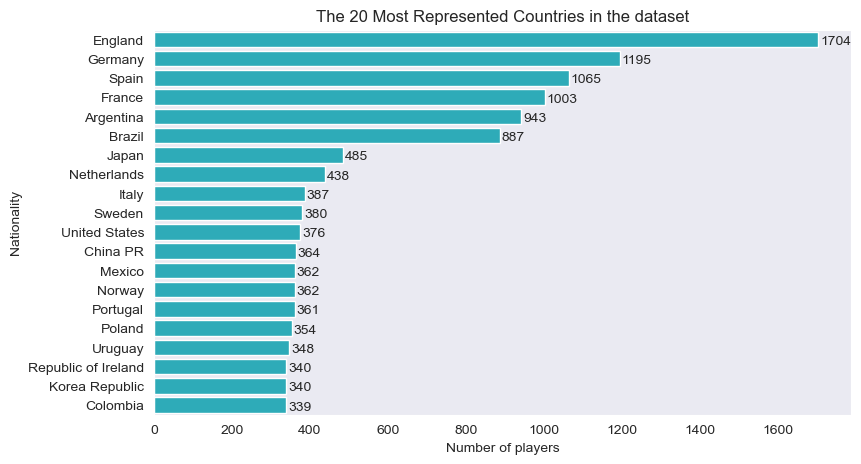

In [78]:
plt.figure(figsize=(9, 5))
nat_order = df.Nationality.value_counts()[:20]
plt.title("The 20 Most Represented Countries in the dataset")
sb.countplot(data=df, y="Nationality", order=nat_order.index, color=base_color)
for i in range(20):
    plt.text(nat_order[i]+5, i+.25, nat_order[i])

plt.xlabel("Number of players");

#### What is the age distribution among players in this dataset?

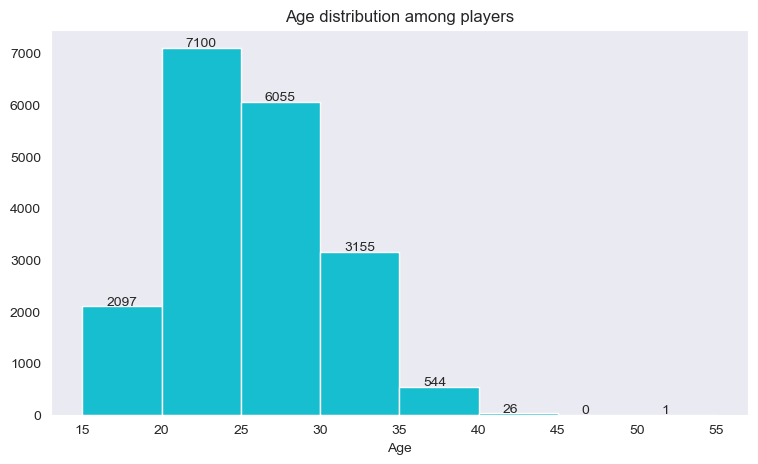

In [79]:
plt.figure(figsize=(9, 5))
bins=np.arange(15, 56, 5)
plt.title("Age distribution among players")
plt.xlabel("Age")
graph=plt.hist(data=df, x="Age", bins=bins, color=base_color)
counts, _ = graph[0], graph[1]
counts = [int(c) for c in counts]
for i in range(8):
    plt.text(bins[i]+1.5, counts[i]+30, counts[i])

In [80]:
# plt.figure(figsize=(5, 6))
# sb.barplot(data=df[df.Nationality in nat_order.index], y="Nationality", x="Wage(€K)", order=nat_order.index, color=base_color)

####  Which clubs have the highest average wage bill?

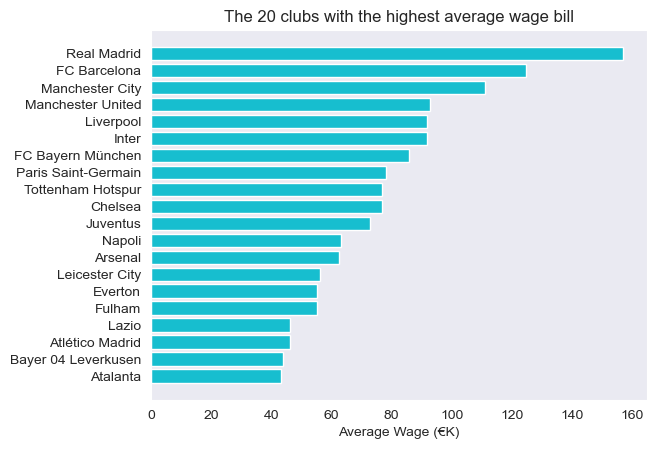

In [81]:
a=df.groupby("Club")[['Wage(€K)']].mean().sort_values("Wage(€K)", ascending=False)[:20]
plt.title("The 20 clubs with the highest average wage bill")
plt.barh(y=a.index[::-1], width=a['Wage(€K)'].sort_values(), color=base_color)
plt.xlabel("Average Wage (€K)");